## pip installs and import libraries

In [1]:
# pip installs
!pip install scanpy
!pip3 install leidenalg
!pip3 install igraph
!pip install anndata
!pip install harmonypy


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.4/124.4 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 5.2 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8023 sha256=4ecf96dbbc03a9f4126b8f6470a4f978c2e6aaf78f447693f16a31ffe7940c24
  Stored in directory: /root/.cache/pip/wheels/6a/aa/b9/eb5d4031476ec10802795b97ccf937b9bd998d68a9b268765a
Successfully built session-info
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 37.0 MB/s eta 0:00:00


In [21]:
# import libraries
import pandas as pd
import scanpy as sc
import numpy as np
import anndata as an
import matplotlib.pyplot as plt
import seaborn as sns
import scanorama

## get data, decompress, create anndata object

In [3]:
!wget -O GSM3746212_Muscle_1_Counts.csv.gz 'https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSM3746212&format=file&file=GSM3746212%5FMuscle%5F1%5FCounts%2Ecsv%2Egz'
!gunzip GSM3746212_Muscle_1_Counts.csv.gz

!wget -O GSM3746213_Muscle_2_Counts.csv.gz 'https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSM3746213&format=file&file=GSM3746213%5FMuscle%5F2%5FCounts%2Ecsv%2Egz'
!gunzip GSM3746213_Muscle_2_Counts.csv.gz

!wget -O GSM3746214_Muscle_3_Counts.csv.gz 'https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSM3746214&format=file&file=GSM3746214%5FMuscle%5F3%5FCounts%2Ecsv%2Egz'
!gunzip GSM3746214_Muscle_3_Counts.csv.gz

!wget -O GSM3746215_Muscle_4_Counts.csv.gz 'https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSM3746215&format=file&file=GSM3746215%5FMuscle%5F4%5FCounts%2Ecsv%2Egz'
!gunzip GSM3746215_Muscle_4_Counts.csv.gz

--2024-07-26 11:18:35--  https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSM3746212&format=file&file=GSM3746212%5FMuscle%5F1%5FCounts%2Ecsv%2Egz
Resolving www.ncbi.nlm.nih.gov (www.ncbi.nlm.nih.gov)... 130.14.29.110, 2607:f220:41e:4290::110
Connecting to www.ncbi.nlm.nih.gov (www.ncbi.nlm.nih.gov)|130.14.29.110|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1169603 (1.1M) [application/octet-stream]
Saving to: ‘GSM3746212_Muscle_1_Counts.csv.gz’

GSM3746212_Muscle_1 100%[===================>]   1.12M  --.-KB/s    in 0.1s    

2024-07-26 11:18:36 (8.74 MB/s) - ‘GSM3746212_Muscle_1_Counts.csv.gz’ saved [1169603/1169603]

--2024-07-26 11:18:36--  https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSM3746213&format=file&file=GSM3746213%5FMuscle%5F2%5FCounts%2Ecsv%2Egz
Resolving www.ncbi.nlm.nih.gov (www.ncbi.nlm.nih.gov)... 130.14.29.110, 2607:f220:41e:4290::110
Connecting to www.ncbi.nlm.nih.gov (www.ncbi.nlm.nih.gov)|130.14.29.110|:443... connected.
HTTP request sent

In [315]:
file_1 = pd.read_csv('GSM3746212_Muscle_1_Counts.csv', index_col=0)
muscle_1 = sc.AnnData(file_1)

file_2 = pd.read_csv('GSM3746213_Muscle_2_Counts.csv', index_col=0)
muscle_2 = sc.AnnData(file_2)

file_3 = pd.read_csv('GSM3746214_Muscle_3_Counts.csv', index_col=0)
muscle_3 = sc.AnnData(file_3)

file_4 = pd.read_csv('GSM3746215_Muscle_4_Counts.csv', index_col=0)
muscle_4 = sc.AnnData(file_4)

adatas = [muscle_1, muscle_2, muscle_3, muscle_4]

adata_combined = sc.concat(adatas, axis=1, label='sample', keys=['muscle_1', 'muscle_2', 'muscle_3', 'muscle_4'])
adata_combined.var_names_make_unique()

In [316]:
# now, i'm going to transpose my anndata object so the rows are cell IDs and the columns are genes (since this is assumed for many downstream analysis packages)
adata_transposed = sc.AnnData(adata_combined.T)
print(adata_transposed.obs_names)  # should list cell IDs
print(adata_transposed.var_names)  # should list gene names

Index(['1_AAACCTGCAATCCGAT', '1_AAACGGGGTCCAGTAT', '1_AAACGGGTCGGCTTGG',
       '1_AAAGATGAGCAATATG', '1_AAAGATGGTCAAAGCG', '1_AAAGTAGCAGCGTCCA',
       '1_AAATGCCAGTTTAGGA', '1_AAATGCCCACCGATAT', '1_AACACGTGTCTGGTCG',
       '1_AACACGTTCACCACCT',
       ...
       '4_TTGACTTGTGATAAGT', '4_TTGCCGTCAAGGTTCT', '4_TTGCGTCAGTGTCCAT',
       '4_TTGGAACGTCGAATCT', '4_TTGTAGGTCAGCTGGC', '4_TTGTAGGTCTCTAAGG',
       '4_TTTACTGAGACTGTAA', '4_TTTACTGTCAGCCTAA', '4_TTTCCTCAGGTGGGTT',
       '4_TTTGGTTCACTGTCGG'],
      dtype='object', length=2876)
Index(['RP11-34P13.7', 'AP006222.2', 'RP4-669L17.10', 'RP11-206L10.3',
       'RP11-206L10.2', 'RP11-206L10.9', 'LINC00115', 'FAM41C', 'SAMD11',
       'NOC2L',
       ...
       'MT-ND5', 'MT-ND6', 'MT-CYB', 'AC145212.1', 'AC011043.1', 'AL592183.1',
       'AL354822.1', 'KIR2DL2', 'PNRC2.1', 'SRSF10.1'],
      dtype='object', length=15406)


In [317]:
num_genes = adata_combined.n_obs
print(f"Number of genes: {num_genes}")

num_cells = adata_combined.n_vars
print(f"Number of cells: {num_cells}")

Number of genes: 15406
Number of cells: 2876


## QC, filtering, normalization

In [318]:
# Start by checking if we have missing data
# Find indices of rows (cells) with NaN values
nan_rows = np.isnan(adata_combined.X).any(axis=1)
print(f"Number of rows with NaN values: {np.sum(nan_rows)}")

# Find indices of columns (genes) with NaN values
nan_cols = np.isnan(adata_combined.X).any(axis=0)
print(f"Number of columns with NaN values: {np.sum(nan_cols)}")

Number of rows with NaN values: 0
Number of columns with NaN values: 0


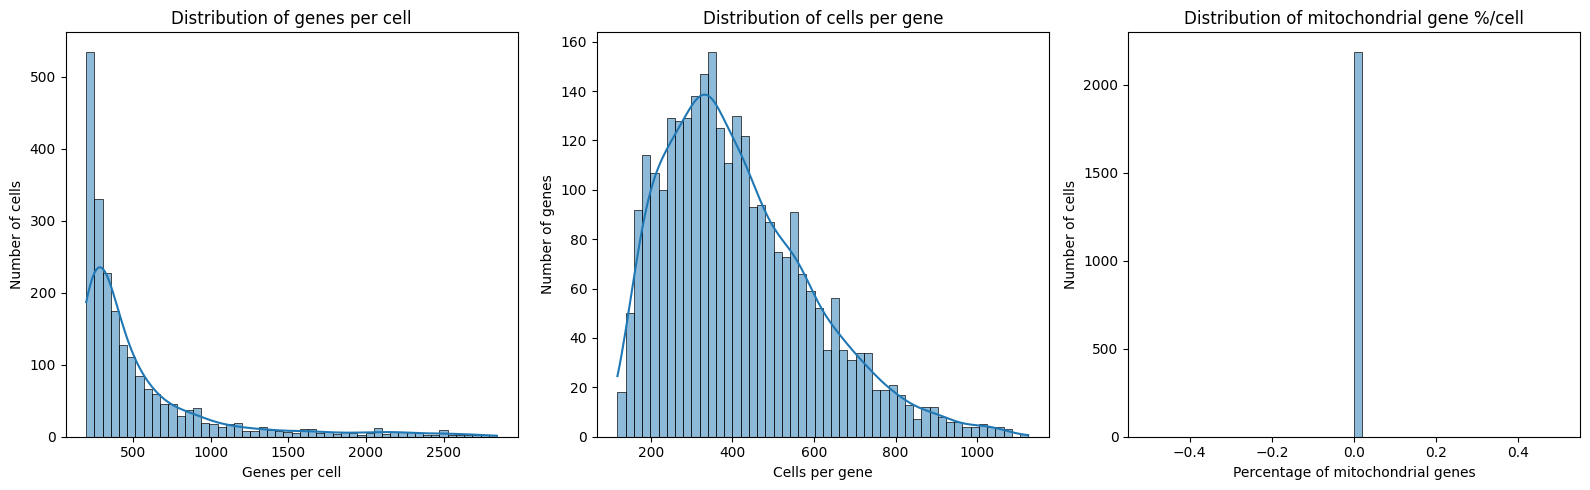

In [337]:
# calculate the number of genes per cell and cells per gene
adata_combined.obs['n_genes'] = (adata_combined.X > 0).sum(axis=1)
adata_combined.var['n_cells'] = (adata_combined.X > 0).sum(axis=0)

# identify mito genes and calculate % of mitogenes per each cell
mt_gene_mask = adata_combined.var_names.str.startswith('MT-')

if isinstance(adata_combined.X, np.ndarray):
    adata_combined.obs['percent_mito'] = np.sum(adata_combined[:, mt_gene_mask].X, axis=1) / np.sum(adata_combined.X, axis=1) * 100
else:
    adata_combined.obs['percent_mito'] = np.sum(adata_combined[:, mt_gene_mask].X.toarray(), axis=1) / np.sum(adata_combined.X.toarray(), axis=1) * 100

# create subplots
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# plot the histogram of the number of genes per cell
sns.histplot(adata_combined.obs['n_genes'], bins=50, kde=True, ax=axes[0])
axes[0].set_xlabel('Genes per cell')
axes[0].set_ylabel('Number of cells')
axes[0].set_title('Distribution of genes per cell')

# plot the histogram of the number of cells per gene
sns.histplot(adata_combined.var['n_cells'], bins=50, kde=True, ax=axes[1])
axes[1].set_xlabel('Cells per gene')
axes[1].set_ylabel('Number of genes')
axes[1].set_title('Distribution of cells per gene')

# plot the distribution of mitochondrial gene percentage
sns.histplot(adata_combined.obs['percent_mito'], bins=50, kde=True, ax=axes[2])
axes[2].set_xlabel('Percentage of mitochondrial genes')
axes[2].set_ylabel('Number of cells')
axes[2].set_title('Distribution of mitochondrial gene %/cell')

plt.tight_layout()
plt.show()

In [338]:
# filter
sc.pp.filter_cells(adata_combined, min_genes=200) #This filters out cells that have fewer than 200 detected genes
sc.pp.filter_genes(adata_combined, min_cells=20) #This filters out genes that appear in fewer than 20 cells.

In [339]:
# print resulting number of cells and genes
num_cells = adata_combined.n_obs
print(f"Number of genes: {num_cells}")
num_genes = adata_combined.n_vars
print(f"Number of cells: {num_genes}")

Number of genes: 2187
Number of cells: 2876


In [334]:
# normalize
sc.pp.normalize_total(adata_combined, target_sum=1e4)
sc.pp.log1p(adata_combined)

## Dimensionality reduction

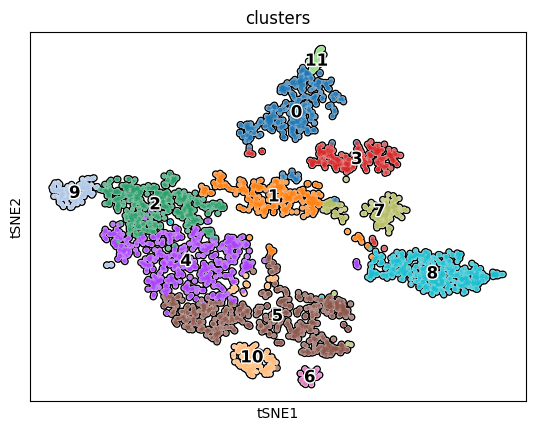

In [331]:
# perform PCA to reduce dimensionality to capture the most variance in the data.
sc.tl.pca(adata_transposed)

# determine the nearest neighbors and cluster the cells.
sc.pp.neighbors(adata_transposed, n_neighbors=10, n_pcs=40)
sc.tl.leiden(adata_transposed, key_added='clusters', resolution=0.4, n_iterations=2, flavor='igraph', directed=False)

# visualize clusters
sc.tl.tsne(adata_transposed)
sc.pl.tsne(adata_transposed, color='clusters', add_outline=True, legend_loc='on data', legend_fontsize=12, legend_fontoutline=2, frameon=True)

## Find marker genes

In [340]:
# perform differential expression analysis
sc.tl.rank_genes_groups(adata_transposed, groupby='clusters', method='t-test')

# find top marker genes for each cluster.
top_markers = sc.get.rank_genes_groups_df(adata_transposed, group=None)

# now, we're going to convert top_markers to DF to get summary of top markers per cluster
top_markers_df = pd.DataFrame(top_markers)

# initialize a dictionary to store top markers
top_genes_per_cluster = {}

# get list of clusters and iterate over each cluster to get top markers
clusters = adata_transposed.uns['rank_genes_groups']['names'].dtype.names

for cluster in clusters:
    top_genes = top_markers_df[top_markers_df['group'] == cluster].head(3)
    top_genes_per_cluster[cluster] = top_genes

# convert dictionary to DataFrame for easy viewing
top_genes_summary = pd.concat(top_genes_per_cluster.values(), keys=top_genes_per_cluster.keys())
print(top_genes_summary)

          group     names     scores  logfoldchanges          pvals  \
0  0          0       GSN  22.131334       25.882130   9.956595e-67   
   1          0      APOD  20.166227      183.602783   2.415331e-61   
   2          0       DCN  19.997965       86.589073   7.738655e-59   
1  15406      1      RGS5  18.082233       21.986212   8.410209e-49   
   15407      1  NDUFA4L2  15.423468        9.357254   2.856708e-39   
   15408      1    NOTCH3  13.013708        5.373955   1.700648e-30   
2  30812      2     BTNL9   9.042464        2.492013   7.918759e-18   
   30813      2       VWF   8.531580        2.291170   2.710415e-16   
   30814      2      AQP1   7.830182        2.251582   3.865148e-14   
3  46218      3      FBN1  17.190029       19.379116   1.898184e-40   
   46219      3     MFAP5  16.349194       36.543087   5.467905e-38   
   46220      3     PLAC9  16.307604       13.296025   5.047109e-38   
4  61624      4     FABP4  13.698985       15.261686   2.902659e-38   
   616

## identify clusters by marker gene


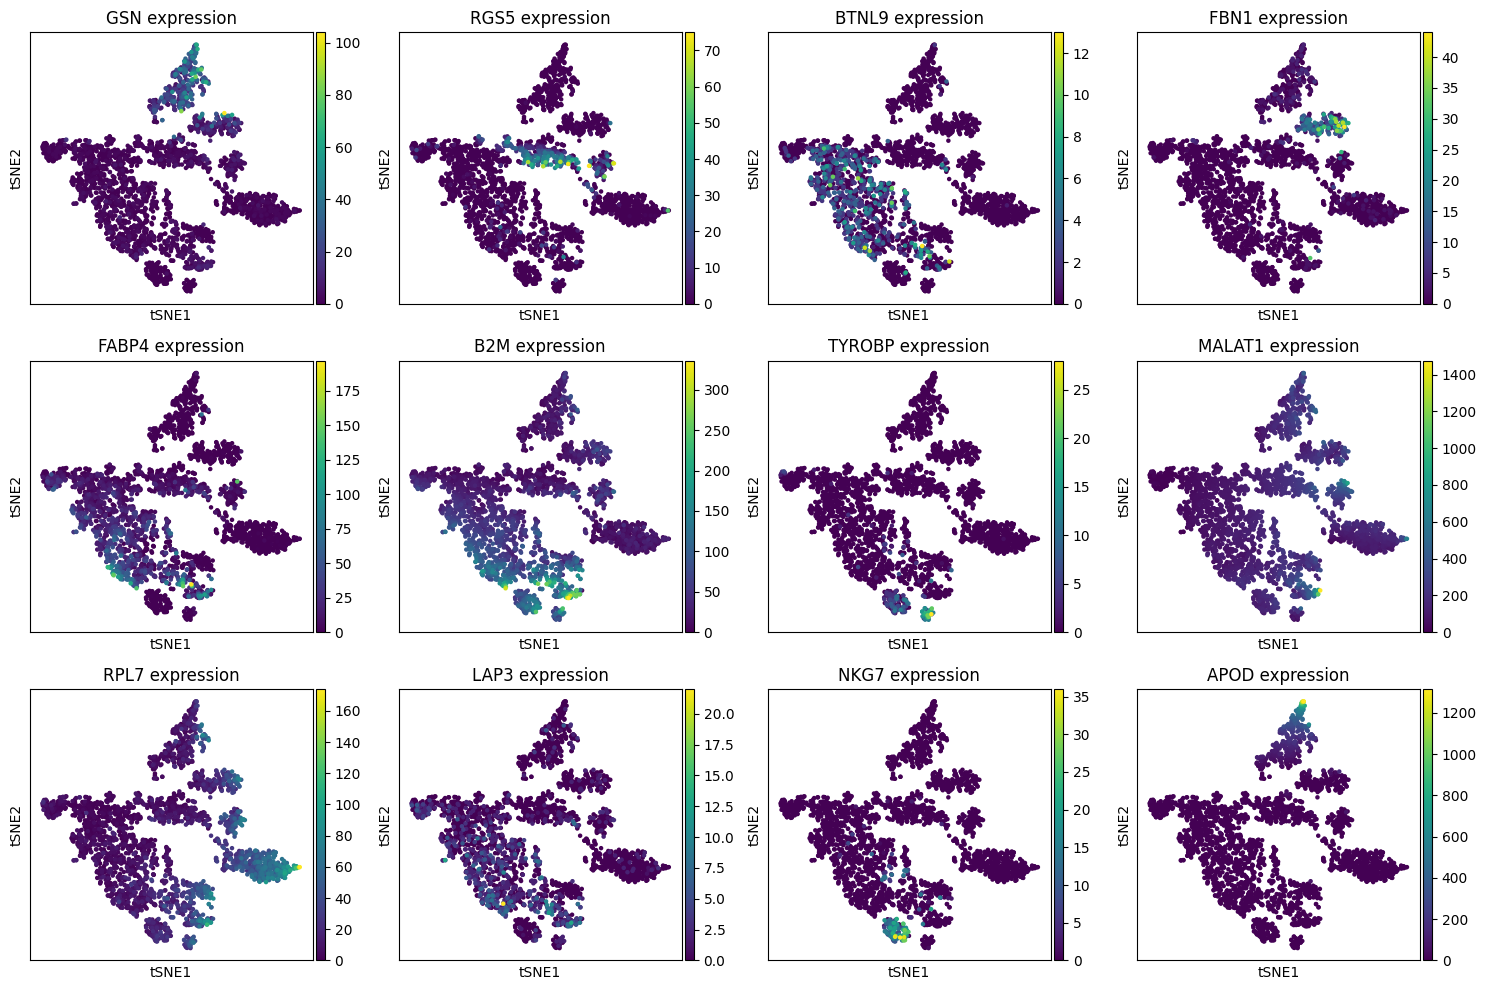

In [342]:
# compute t-SNE
sc.tl.tsne(adata_transposed)

# fefine your marker genes
marker_genes = ['GSN', 'RGS5', 'BTNL9', 'FBN1', 'FABP4', 'B2M', 'TYROBP', 'MALAT1', 'RPL7', 'LAP3', 'NKG7', 'APOD']

# create a figure with 3 rows of subplots
n_rows = 3
n_cols = 4  # Adjust based on the number of marker genes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))

# flatten the axes array for easy iteration
axes = axes.flatten()

# loop through each marker gene and plot its expression
for i, gene in enumerate(marker_genes):
    if gene in adata_transposed.var_names:
        sc.pl.tsne(adata_transposed, color=gene, ax=axes[i], show=False)
        axes[i].set_title(f'{gene} expression')
    else:
        print(f"Warning: Gene {gene} not found in dataset.")
        axes[i].set_title(f'{gene} not found')

plt.tight_layout()
plt.show()